# Load package

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [116]:
## 시각화 한글 인식
from matplotlib import font_manager, rc
font_fname = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

# Data Load

In [117]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 5801-422E

 C:\Users\Moon\Google 드라이브\경배끄10\넥슨\2017하반기_신입공채_데이터분석 과제\신입공채과제_Type_A 디렉터리

2017-10-25  오전 11:54    <DIR>          .
2017-10-25  오전 11:54    <DIR>          ..
2017-10-23  오전 09:59    <DIR>          .ipynb_checkpoints
2017-10-23  오후 06:32    <DIR>          cache
2017-10-20  오후 06:26           160,616 pokemon.csv
2017-10-25  오전 10:58           183,880 pokemon_clear_data.csv
2017-10-23  오후 05:54           159,247 pokemon_clear_data2.csv
2017-10-20  오후 08:07             3,078 ReadMe.txt
2017-10-23  오후 03:23           184,109 이상치제거_데이터.csv
2017-10-25  오전 11:54           663,520 포켓몬의 세계란....ipynb
               6개 파일           1,354,450 바이트
               4개 디렉터리  431,756,525,568 바이트 남음


In [118]:
## 데이터 읽기
data = pd.read_csv('pokemon.csv')
print(data.shape)
data.head(3)

(801, 41)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0


In [119]:
## column 기본 정보살피기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

### Results
* 주어진 데이터의**정의**에서는 모든 변수들은 NaN값이 없다.
* 하지만 몇가지 변수들이 NaN값을 포함한게 보인다. 이에 대한 탐구가 필요하다.
* Metadata탐색결과 "height_m","type2","weight_kg"의 null 값은 **단순 결측치**이다. 
* "percentage_male"의 NaN 값은 **중성**을 의미한다.
* 모든 값을 치환한 후 **"이상값(Outlier)"**의 확인이 필요하다.

####  => 각 변수의 특성에 맞는 전처리필요 & 이상값 확인필요


# Raw data Pre-processing
1. percentage_male의 치환
2. "height_m","type2","weight_kg" 결측값의 적절한 치환값

## 1. percentage_male의 치환
* 0은 "여성 몬스터" ~ 100은 "남성 몬스터" 따라서 "중성"인 NaN은 **-1**로 치환하겠다.

In [120]:
val_length = str(len(data))
pm_change_length = str(len(data[data['percentage_male'].isnull()]))
                 
print("전체 변수 값의 개수 : {0}, 치환해야할 변수 값의 개수 : {1}".format(val_length, pm_change_length))

전체 변수 값의 개수 : 801, 치환해야할 변수 값의 개수 : 98


In [121]:
## 치환 변수들의 값 치환 : -1 (중성)
data.loc[data['percentage_male'].isnull(),'percentage_male'] = -1

In [122]:
## 결과확인 : 98개의 변수 치환 완료
print(data[data['percentage_male']==-1].shape)
data[data['percentage_male']==-1].head(3)

(98, 41)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
80,"['Magnet Pull', 'Sturdy', 'Analytic']",0.5,1.0,0.5,0.5,0.5,2.0,2.0,0.25,1.0,...,-1.0,81,95,55,45,electric,steel,6.0,1,0
81,"['Magnet Pull', 'Sturdy', 'Analytic']",0.5,1.0,0.5,0.5,0.5,2.0,2.0,0.25,1.0,...,-1.0,82,120,70,70,electric,steel,60.0,1,0
99,"['Soundproof', 'Static', 'Aftermath']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.50,1.0,...,-1.0,100,55,55,100,electric,NaN,10.4,1,0


## 2. "height_m","type2","weight_kg" 결측값의 적절한 치환값
* 간단한 방법 : mean 또는 누락 값 제거
* 두번째 방법 : 상관성이 높은 변수와의 연관성을 고려한 치환

### 2.1 변수탐색

In [123]:
## type2 변수의 탐색
type2_nan = len(data[data['type2'].isnull()])
                 
print("전체 변수 값의 개수 : {0}, 치환해야할 변수 값의 개수 : {1}".format(str(len(data)), str(type2_nan)))

type2_dummy_view = pd.concat([data[data['type2'].isnull()].head(3), data[data['type2'].notnull()].head(3)])
type2_dummy_view

전체 변수 값의 개수 : 801, 치환해야할 변수 값의 개수 : 384


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
6,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0


### tpye2 변수 탐색결과
* null이 포함된 변수와 null이 포함되지 않은 값들의 비교 에도 특별한 차이점을 찾을 수 없다.
* **name**을 통해 어느정도 유추할 수 있지만 이는 **tpye1**에 언급되기 때문에 큰 의미가 없을것으로 보인다.

### => 따라서, "결측치" 상태로 유지한다.

In [124]:
## height_m 변수의 탐색
height_m_nan = data[data['height_m'].isnull()]
                 
print("전체 변수 값의 개수 : {0}, 치환해야할 변수 값의 개수 : {1}".format(str(len(data)), str(len(height_m_nan))))

전체 변수 값의 개수 : 801, 치환해야할 변수 값의 개수 : 20


In [125]:
## weight_kg 변수의 탐색
weight_kg_nan = data[data['weight_kg'].isnull()]
                 
print("전체 변수 값의 개수 : {0}, 치환해야할 변수 값의 개수 : {1}".format(str(len(data)), str(len(weight_kg_nan))))

전체 변수 값의 개수 : 801, 치환해야할 변수 값의 개수 : 20


In [126]:
## 치환을 위한 상관성이 큰 변수 찾기
data.corr()[['height_m','weight_kg']].T

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
height_m,-0.060858,0.019219,0.164464,0.003068,0.115360,0.059184,-0.085808,-0.072985,0.032553,0.030583,...,1.000000,0.478369,-0.148437,0.008580,0.353007,0.328327,0.202202,0.626551,-0.025525,0.322155
weight_kg,-0.031909,0.038871,0.126003,-0.102926,0.098523,0.161564,-0.044124,-0.126744,0.047869,0.050129,...,0.626551,0.427743,-0.234243,0.123567,0.245218,0.306523,0.051384,1.000000,0.085767,0.393023


In [127]:
## 두 변수 모두 서로 +0.65의 다른 변수들과 비교할때 가장 높은 상관성을 가진다.
print(data.corr()['height_m'].rank(ascending=False)['weight_kg'])
print(data.corr()['weight_kg'].rank(ascending=False)['height_m'])

2.0
2.0


In [128]:
## 하지만 두 변수의 null값의 index가 동일하므로 상관변수를 통한 치환은 불가능
print(height_m_nan.index)
print(weight_kg_nan.index)

Int64Index([ 18,  19,  25,  26,  27,  36,  37,  49,  50,  51,  52,  73,  74,
             75,  87,  88, 102, 104, 719, 744],
           dtype='int64')
Int64Index([ 18,  19,  25,  26,  27,  36,  37,  49,  50,  51,  52,  73,  74,
             75,  87,  88, 102, 104, 719, 744],
           dtype='int64')


### height_m , wight_kg 변수 탐색결과
* 두 변수의 NaN 값들이 공통된 index를 가짐을 알 수 있다.
* 따라서 가장 높은 상관성을 통한 치환은 불가능하다.

#### => 차선책으로 2번째로 높은 상관성의 변수를 통해 치환한다. 하지만 두 변수의 상관성이 높으므로 공통으로 높은 변수를 택해야한다

## 2.2 변수치환
* **치환식**

\begin{align}
\ x: base total변수  & & y : weight변수 && or &&  height변수 \\
\end{align}

$$value=\sum_{i=0}^n \frac{(logx-logy)}{n} $$

* value를 구한 후 y변수의 null 값들을 다음식 처럼 치환한다. 

$$ null값 = e^{log(x)   -   value} $$

In [129]:
## 'base_total' 변수가 hegit_m, weight_kg 변수 모두와 2번째로 상관성이 높으므로 이 변수를 통해 값을 치환한다.
print(data.corr()['height_m'].rank(ascending=False)['base_total'])
print(data.corr()['weight_kg'].rank(ascending=False)['base_total'])

3.0
3.0


In [130]:
## base_total은 Metadata에서 정의되지 않았다.
## -> 데이터탐색 결과 무게, 키, 능력치(공격력, 수비력, 속도 등) 과 높은 상관성을 보인다.
## -> 탐색결과 : 'base_total' = attack','defense','hp','sp_attack','sp_defense','speed'의 합으로 보임
## 따라서 base_total을 통해 weight와 heigth의 유추가 신뢰성 있다 판별가능.
pd.DataFrame(data.corr()['base_total']).T

print("base_total 값 : {0} ".format(data.loc[1]['base_total']))
print("pokemoon 능력치 변수들 값의 합 : {0} ".format(data.loc[1][['attack','defense','hp','sp_attack','sp_defense','speed']].sum()))

base_total 값 : 405 
pokemoon 능력치 변수들 값의 합 : 405 


In [131]:
## 치환 기준 value 구하기
heigth_notnull = data[data['height_m'].notnull()]
weight_notnull = data[data['weight_kg'].notnull()]

print(heigth_notnull.shape)
mean_value_height = (np.log(heigth_notnull['base_total']) - np.log(heigth_notnull['height_m'])).mean()
mean_value_weight = (np.log(weight_notnull['base_total']) - np.log(weight_notnull['weight_kg'])).mean()
print(mean_value_height)
print(mean_value_weight)

(781, 41)
6.1250653271864595
2.87672660579262


In [132]:
## Height NaN 값 치환
data.loc[data['height_m'].isnull(),'height_m'] = round(np.exp((abs(np.log(data['base_total']) - mean_value_height))),1)
## weight NaN 값 치환
data.loc[data['weight_kg'].isnull(),'weight_kg'] = round(np.exp((abs(np.log(data['base_total']) - mean_value_weight))),1)

In [133]:
## NaN였던 18번 index의 치환 값 확인
data.loc[18][['height_m','weight_kg']]

height_m      1.8
weight_kg    14.2
Name: 18, dtype: object

In [134]:
## NaN 값 치환확인 2
check_height_nan = data[data['height_m'].isnull()]
check_weight_nan = data[data['weight_kg'].isnull()]
                 
print("Height_m 변수의 NaN 값의 개수 : {0}".format(str(len(check_height_nan))))
print("Weight_kg 변수의 NaN 값의 개수 : {0}".format(str(len(check_weight_nan))))

Height_m 변수의 NaN 값의 개수 : 0
Weight_kg 변수의 NaN 값의 개수 : 0


### Result
* type2를 제외한 모든 누락 값들을 치환하였다.

## 3. Outlier 확인
1. 직관적 탐색
2. Box-plot 탐색

### 1. 직관적 탐색을 통한 이상치 확인

In [135]:
data.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.166916,68.958801,48.285268,401.000000,71.305868,70.911361,66.334582,60.425843,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.067599,26.576015,26.443910,231.373075,32.353826,27.942501,28.907662,108.147456,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,-1.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.300000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.000000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,61.500000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [136]:
## capture_rate 변수의 이상치 발견
print(data['capture_rate'][1])
print(data['capture_rate'][773])



45
30 (Meteorite)255 (Core)


In [137]:
print("바뀌기전 데이터 차원" + str(data.shape))
data = data[data['capture_rate']!='30 (Meteorite)255 (Core)']
print("바뀐 후 데이터 차원" + str(data.shape))

바뀌기전 데이터 차원(801, 41)
바뀐 후 데이터 차원(800, 41)


### 2. Box-plot을 통한 이상값 확인
* 그림 whisker(수염) 밖에 있는 부분은 모두 이상값으로 볼것인가?
* outlier 기준 식 = {Q3(75th percentile)-Q1(25th percentile)} * 1.5

![title](http://cfile22.uf.tistory.com/image/2532913754A7F3893809E7)   


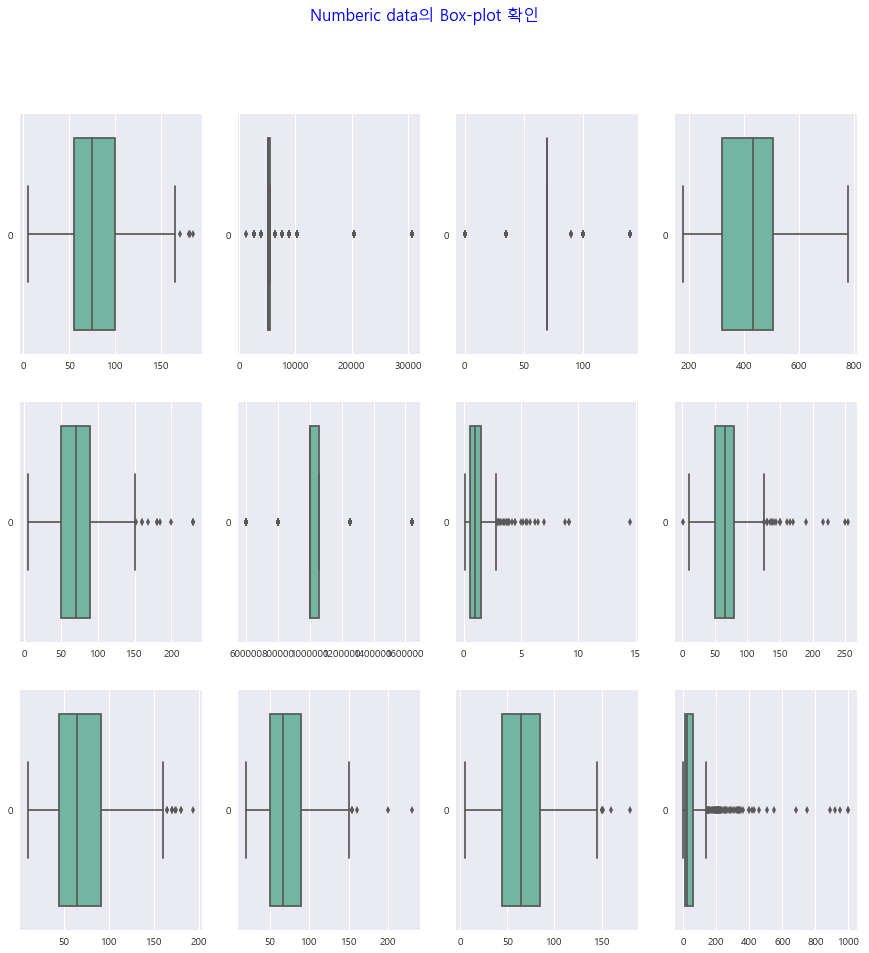

In [138]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12)) = plt.subplots(3,4)
fig.set_size_inches(15,15)

## Boxplot 그리기
sns.boxplot(data=data['attack'], orient="h", palette="Set2",ax=ax1)
sns.boxplot(data=data['base_egg_steps'], orient="h", palette="Set2",ax=ax2)
sns.boxplot(data=data['base_happiness'], orient="h", palette="Set2",ax=ax3)
sns.boxplot(data=data['base_total'], orient="h", palette="Set2",ax=ax4)
sns.boxplot(data=data['defense'], orient="h", palette="Set2",ax=ax5)
sns.boxplot(data=data['experience_growth'], orient="h", palette="Set2",ax=ax6)
sns.boxplot(data=data['height_m'], orient="h", palette="Set2",ax=ax7)
sns.boxplot(data=data['hp'], orient="h", palette="Set2",ax=ax8)
sns.boxplot(data=data['sp_attack'], orient="h", palette="Set2",ax=ax9)
sns.boxplot(data=data['sp_defense'], orient="h", palette="Set2",ax=ax10)
sns.boxplot(data=data['speed'], orient="h", palette="Set2",ax=ax11)
sns.boxplot(data=data['weight_kg'], orient="h", palette="Set2",ax=ax12)

fig.suptitle("Numberic data의 Box-plot 확인", fontsize=16, color='blue')


### Result
* 801 개의 변수밖에 없는데 이상치를 검출하는게 유의미할까?
* 잘못입력된 **오탈자**는 없는 것으로 확인하였다.
* => 또한 각 데이터가 의미하는 것은 포켓몬의 **종류**인데 각기 다른데이터로 이상치를 검출 하는 것은 말이 안된다. 
* => **오탈자**가 없다고 판단되는 상황에서 이 데이터의 이상치는 없는것으로 판단한다.
#### base_total 데이터는 유일하게 완전히 이상값이 없다고 판단되므로 포켓몬의 "능력"을 판단하기 가장 적절한 변수로 생각된다.

In [139]:
data.to_csv('pokemon_clear_data.csv')

### Pre-processing 결과
* 누락값, 이상값을 처리한 data 저장

# Data Exploration
1. 각 변수들의 의미를 탐색
2. Categorical 변수를(**종족**) 중심으로 데이터 탐색

## 1. 각 변수들의 의미 탐색

* name: The English name of the Pokemon   
* japanese_name: The Original Japanese name of the Pokemon   
* pokedex_number: The entry number of the Pokemon in the National Pokedex   
* percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.   
* type1: The Primary Type of the Pokemon   
* type2: The Secondary Type of the Pokemon   
* classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex   
* height_m: Height of the Pokemon in metres
* weight_kg: The Weight of the Pokemon in kilograms
* capture_rate: Capture Rate of the Pokemon
* base_egg_steps: The number of steps required to hatch an egg of the Pokemon
* abilities: A stringified list of abilities that the Pokemon is capable of having
* experience_growth: The Experience Growth of the Pokemon
* base_happiness: Base Happiness of the Pokemon
* against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
* hp: The Base HP of the Pokemon
* attack: The Base Attack of the Pokemon
* defense: The Base Defense of the Pokemon
* sp_attack: The Base Special Attack of the Pokemon
* sp_defense: The Base Special Defense of the Pokemon
* speed: The Base Speed of the Pokemon
* generation: The numbered generation which the Pokemon was first introduced
* is_legendary: Denotes if the Pokemon is legendary.

    ----------------------------------------------------------------------------------------------------------------
    base_total = attack + defense + hp + sp_attack + sp_defense + speed
    가성비 좋은 종족 : 잡기 쉽고(capture_rate), 키우기 쉽지만(base_egg_steps) 적당한 능력치(base_total)를 가진 종족
    -----------------------------------------------------------------------------------------------------------------
    

## 2. 시각화를 통한 "포캣몬 종족"별 데이터 탐색

In [140]:
pokemon_data = pd.read_csv('pokemon_clear_data.csv', encoding='ISO-8859-1')
pokemon_data = pokemon_data.drop(['Unnamed: 0'],axis=1)
print(pokemon_data.shape)
pokemon_data.head(3)

(800, 41)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0


In [141]:
data['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [142]:
def visualization(val,title):
    val.set_title(title, fontsize=18, weight='bold')
    val.tick_params(axis='both', which='major', labelsize=15)

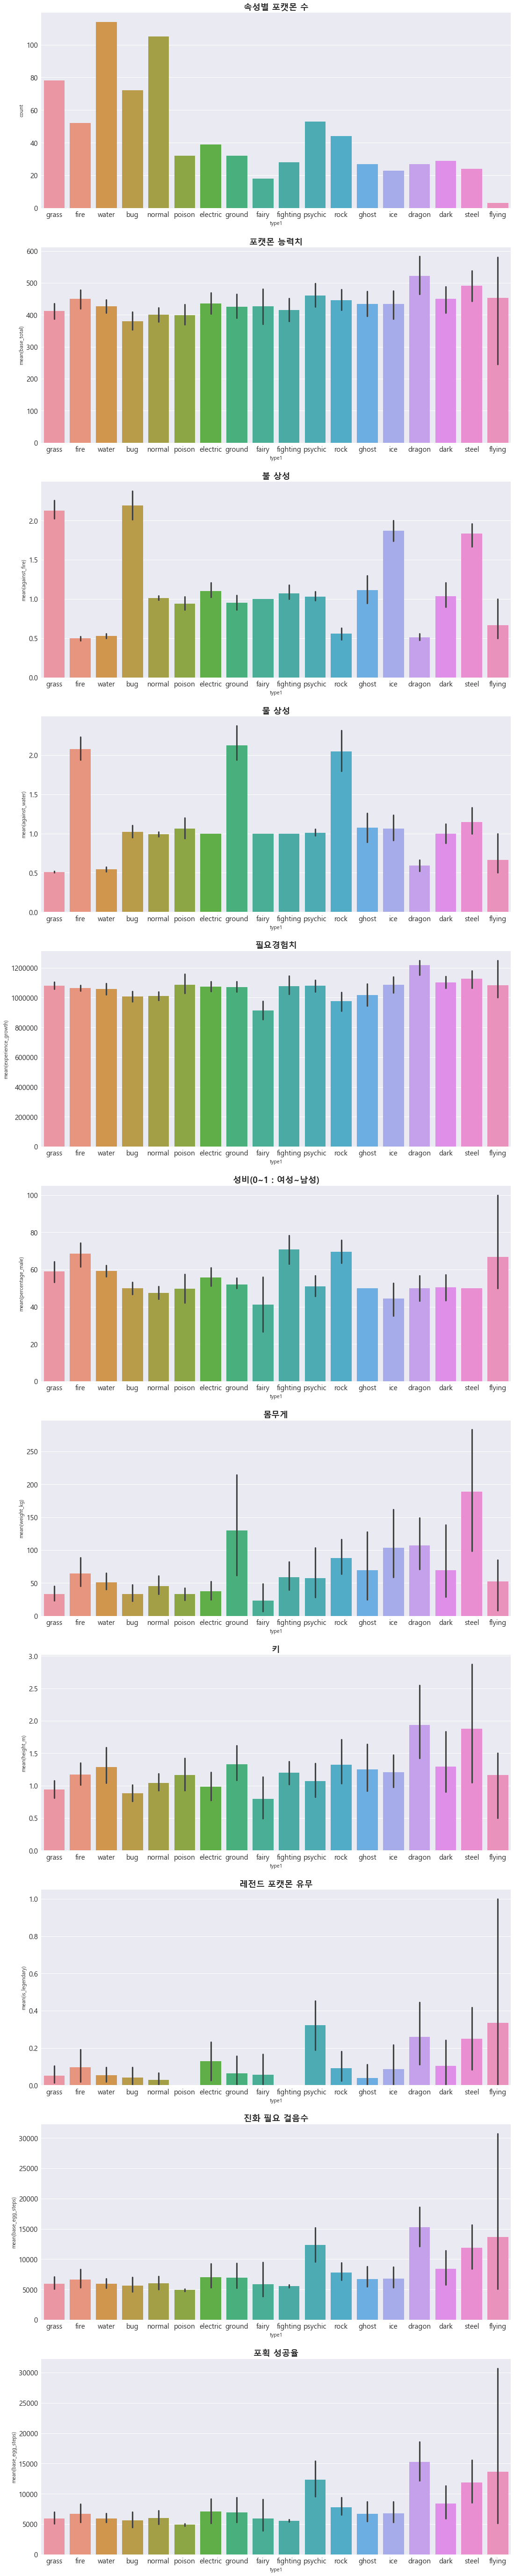

In [143]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11) = plt.subplots(11,1)
fig.set_size_inches(18,100)

sns.countplot(data=data, x='type1', ax=ax1)
visualization(ax1, '속성별 포캣몬 수')
sns.barplot(data=data, x='type1',y='base_total',ax=ax2)
visualization(ax2,'포캣몬 능력치')
sns.barplot(data=data, x='type1',y='against_fire',ax=ax3)
visualization(ax3,'불 상성')
sns.barplot(data=data, x='type1',y='against_water',ax=ax4)
visualization(ax4,'물 상성')
sns.barplot(data=data, x='type1',y='experience_growth',ax=ax5)
visualization(ax5,'필요경험치')

## 성비 데이터 변경(중성 제거)
data2 = data[data['percentage_male']!=-1]
sns.barplot(data=data2, x='type1',y='percentage_male',ax=ax6)
visualization(ax6,'성비(0~1 : 여성~남성)')
sns.barplot(data=data, x='type1',y='weight_kg',ax=ax7)
visualization(ax7,'몸무게')
sns.barplot(data=data, x='type1',y='height_m',ax=ax8)
visualization(ax8,'키')
sns.barplot(data=data, x='type1',y='is_legendary',ax=ax9)
visualization(ax9,'레전드 포캣몬 유무')
sns.barplot(data=data, x='type1',y='base_egg_steps',ax=ax10)
visualization(ax10,'진화 필요 걸음수')
sns.barplot(data=data, x='type1',y='base_egg_steps',ax=ax11)
visualization(ax11,'포획 성공율')


### Result
* 포캣몬 능력치 : bug 포캣몬이 상대적으로 조금 낮고, dragon, steel 포캣몬이 높다. 나머지 포캣몬의 평균은 비슷한 편이다.   
! flying종족이 편차가 매우 큰걸 볼 수 있다.
* 상성 : 확실히 **"종족"**마다 **반대**되는 상관성을 가지는 상성이 존재한다.   
ex) 불 <-> 물   
* 필요경험치 : fairy종족이 특별히 **낮다** -> 빠른 성장으로 게임을 즐기는 유저 추천
* 성비(**중성제외**) : fairy종족이 확실히 요정 족 답게 "여성캐릭"이 많고, fighting, rock종족이 "남성"이 많다.
* 몸무게, 키 : steel종족이 상대적으로 크다.
* 레전드 포켓몬 유무 : psychic, flying 종족이 많은데 이중, flying종족은 극단적인 **편차**를 가진다. 이는 **포캣몬 능력치**에서 살펴 본 편차 양상과 일치한다. 즉, flying종족은 능력의 **빈부격차**가 매우 크다. -> 대박 or 쪽박
* 진화 필요 결음수 : poison이 제일 낮지만.... 능력치도 낮다... -> 능력치와 성장속도는 확실히 반비례한다. 하지만 **가성비**좋은 종족도 확실히 존재한다.   
ex) dark
* 포획 성공률(잡기 쉬운 정도) : poison이 가장 출현빈도가 높다. psychic이 가성비가 좋은 종족으로 보인다.

```python
!! 가설1 : 사전에 정의된 속성(type1) 즉, "일반적인 상성"과 다른 포캣몬이 있을까??
!! 가설2 : 그렇다면, 예전부터 존재하는 "포캣몬들의 결혼"과 "자식"에 대한 괴담같은 "이종포캣몬!!"이 있지않을까??
```

# 가설 1
## 1. 군집확인

   * 군집화를 통해 **정의된 속성 분류**와 다른 속성에 속하는 포캣몬을 찾아보자.
   * 군집화에서 가장 중요한 것은 분류 **기준**이다.
   * 빈도수, 비율 등 다양한 방법이 있지만, **기존의 속성을 가장 많이 포함하는 군집**을 상성을 통한 포캣몬 분류의 기준으로 삼는다.    
ex) 'fire' 속성의 포켓몬은 군집화 결과 5, 16, 12의 군집으로 각각 45개, 6개, 1개 속하게 된다. 따라서 가장 많은 45개가 속한 **5번**이 새로운 fire 속성의 군집이 된다.
```python
cluster_table[cluster_table['사전에 정의된 속성']=='fire']['상성으로 군집화 한 속성'].value_counts()
# output = 5 : 45, 16 : 6, 12 : 1
```

In [144]:
from sklearn.cluster import KMeans
import mglearn
from tqdm import tqdm

In [145]:
element_differ = ['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water']
cluster_value = data[element_differ]

In [146]:
## 속성(18개)을 기준으로 군집화
kmeans = KMeans(n_clusters=18, random_state=1)
kmeans.fit(cluster_value)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=18, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [147]:
## 각각의 포캣몬 별로 "사전에 정의된 속성(Metadata) <-> K-means로 정의한 속성" 을 비교
cluster_table = pd.concat([ pokemon_data[['name','type1']], pd.DataFrame(kmeans.labels_)],axis=1)
cluster_table.columns = ['포캣몬이름','사전에 정의된 속성', '상성으로 군집화 한 속성']
cluster_table

,포캣몬이름,사전에 정의된 속성,상성으로 군집화 한 속성
0,Bulbasaur,grass,2
1,Ivysaur,grass,2
2,Venusaur,grass,2
3,Charmander,fire,5
4,Charmeleon,fire,5
5,Charizard,fire,16
6,Squirtle,water,1
7,Wartortle,water,1
8,Blastoise,water,1
9,Caterpie,bug,2


In [148]:
## 각각의 군집(18개)가 실제 어떤 속성에 해당되는지 알아본다.
## 이때, 기준은 속성의 포캣몬이 "가장 많이 속한" 군집의 번호로한다.

dict_label = {}

for index in tqdm(pokemon_data['type1'].unique()):
    temp = cluster_table[cluster_table['사전에 정의된 속성']==index]['상성으로 군집화 한 속성'].value_counts().index[0]
    
    dict_label[index] = temp
    

100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 499.97it/s]


In [149]:
dict_label.items()

dict_items([('grass', 6), ('fire', 5), ('water', 1), ('bug', 2), ('normal', 8), ('poison', 17), ('electric', 11), ('ground', 11), ('fairy', 7), ('fighting', 0), ('psychic', 3), ('rock', 14), ('ghost', 3), ('ice', 8), ('dragon', 4), ('dark', 8), ('steel', 9), ('flying', 13)])

### Result
* 18개의 군집으로 속성들을 분류하였지만, 중복되는 속성이 보인다. ex) dark, ice, normal (8번 군집)
* 이는 데이터의 부족과 함께 상성이 일치하는 속성도 있다고 생각하고, 억지로 속성을 나누지 않고 **공통된 군집**으로 포함시킨다.

## 2. 사전적 속성과 군집속성의 비교

### 2.1. 기존과의 차이 확인하기

In [150]:
## 각각의 사전적 속성의 포켓몬 개체 수
type1_count = pd.DataFrame(pokemon_data['type1'].value_counts()).reset_index()
type1_count.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
index,water,normal,grass,bug,psychic,fire,rock,electric,poison,ground,dark,fighting,ghost,dragon,steel,ice,fairy,flying
type1,114,105,78,72,53,52,44,39,32,32,29,28,27,27,24,23,18,3


In [151]:
## 새로운 군집에 따른 포켓몬 개체 수
# 10,12,15,16 의 군집은 'other'란 속성으로 정의하여 확실한 사전적 속성이 없는 변수들이다.
cluster_label = pd.DataFrame(kmeans.labels_)
cluster_count = pd.DataFrame(cluster_label[0].value_counts()).reset_index()

for label, c_number in dict_label.items():
    cluster_count.loc[cluster_count['index']==c_number,'index'] = label
    
cluster_count.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
index,water,normal,grass,psychic,bug,15,fire,electric,fighting,fairy,steel,dragon,poison,rock,16,flying,12,10
0,99,95,72,68,61,56,54,52,34,33,33,28,28,27,23,15,13,9


In [152]:
## Merge()를 사용하여 보기좋게 테이블 합치기
comp_type_table = pd.merge(type1_count, cluster_count, on='index')

## Table 전처리
comp_type_table.loc[comp_type_table['index']=='electric','index'] = 'electric_ground'
comp_type_table.loc[comp_type_table['index']=='psychic','index'] = 'psychic_ghost'
comp_type_table.loc[comp_type_table['index']=='normal','index'] = 'normal_ice_dark'
comp_type_table.columns=['new_type','기존 값','K-means 값']
comp_type_table.index = comp_type_table['new_type']
comp_type_table = comp_type_table.drop(['new_type'],axis=1)

comp_type_table.T

new_type,water,normal_ice_dark,grass,bug,psychic_ghost,fire,rock,electric_ground,poison,fighting,dragon,steel,fairy,flying
기존 값,114,105,78,72,53,52,44,39,32,28,27,24,18,3
K-means 값,99,95,72,61,68,54,27,52,28,34,28,33,33,15


### Result
* 어느정도 군집의 변화가 있는걸 확인할 수 있다.
* 이 차이가나는 포캣몬들을 **이종포캣몬(사전적 분류와 다른 포캣몬)**이라고 정의하자!

### 2.2 이중포켓몬 추출하기
* 먼저, 이중포켓몬인 애들을 추출하자

In [153]:
dict_label.items()

dict_items([('grass', 6), ('fire', 5), ('water', 1), ('bug', 2), ('normal', 8), ('poison', 17), ('electric', 11), ('ground', 11), ('fairy', 7), ('fighting', 0), ('psychic', 3), ('rock', 14), ('ghost', 3), ('ice', 8), ('dragon', 4), ('dark', 8), ('steel', 9), ('flying', 13)])

In [154]:
cluster_table2 = cluster_table.copy()
cluster_table2.columns = ['poke_name','raw_type','new_type']

## 기존 속성(raw_type)과 군집 속성(new_type)의 비교를 위해 raw_type을 int형인 raw_type2로 치환해준다.
for index, new_type in dict_label.items():
    cluster_table2.loc[cluster_table2['raw_type']==index ,'raw_type2'] = new_type

## 자료형을 int로 맞춰준다.
cluster_table2['raw_type2'] = cluster_table2['raw_type2'].apply(int)

print(cluster_table2.shape)
cluster_table2.head(3)

(800, 4)


,poke_name,raw_type,new_type,raw_type2
0,Bulbasaur,grass,2,6
1,Ivysaur,grass,2,6
2,Venusaur,grass,2,6


In [155]:
## 이종 or 동일로 "이종포켓몬"을 정의한다.
cluster_table2['check'] = cluster_table2['new_type']-cluster_table2['raw_type2']
cluster_table2.loc[cluster_table2['check']==0,'check'] = '순종'
cluster_table2.loc[cluster_table2['check']!='순종','check'] = '이종'

print(cluster_table2.shape)
cluster_table2.head(10)

(800, 5)


,poke_name,raw_type,new_type,raw_type2,check
0,Bulbasaur,grass,2,6,이종
1,Ivysaur,grass,2,6,이종
2,Venusaur,grass,2,6,이종
3,Charmander,fire,5,5,순종
4,Charmeleon,fire,5,5,순종
5,Charizard,fire,16,5,이종
6,Squirtle,water,1,1,순종
7,Wartortle,water,1,1,순종
8,Blastoise,water,1,1,순종
9,Caterpie,bug,2,2,순종


In [156]:
fusion_pokemon = cluster_table2[cluster_table2['check'] == '이종']
print(fusion_pokemon.shape)
pure_pokemon = cluster_table2[cluster_table2['check'] == '순종']
print(pure_pokemon.shape)
pure_pokemon.head(3)

(256, 5)
(544, 5)


,poke_name,raw_type,new_type,raw_type2,check
3,Charmander,fire,5,5,순종
4,Charmeleon,fire,5,5,순종
6,Squirtle,water,1,1,순종


### Result
* '이종'과 '순종' 포켓몬을 256, 544개로 구분하였다.
* 가설의 검증이 필요

# 3. 가설에 따른 데이터 분석
1. 가설검증   

2. "이종"포켓몬의 특징을 알아보고, 일반적인 포켓몬과의 차이를 알아보자.

## 3.0 (1) 이종 포켓몬 데이터 전처리

In [157]:
## merge를 위해 특정 칼럼 명 변경
fusion_pokemon=fusion_pokemon.rename(columns = {'poke_name':'name'})

In [158]:
## 기존 능력치 데이터와 추출한 '이종'포켓몬 데이터의 병합
## 병합기준 : 포켓몬이름
fusion_poke_hap = pd.merge(fusion_pokemon,pokemon_data, on ='name')

print(fusion_poke_hap.shape)
fusion_poke_hap.head(3)

(256, 45)


,name,raw_type,new_type,raw_type2,check,abilities,against_bug,against_dark,against_dragon,against_electric,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Bulbasaur,grass,2,6,이종,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,Ivysaur,grass,2,6,이종,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,Venusaur,grass,2,6,이종,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,...,88.1,3,122,120,80,grass,poison,100.0,1,0


In [159]:
dict_label2 = {'bug': 2,'dark_ice_normal':8,'dragon': 4,'electric_ground': 11,'fairy': 7,'fighting': 0,'fire': 5,'flying': 13,
               'ghost_psychic': 3,'grass': 6,'poison': 17,'rock': 14,'steel': 9,'water': 1,'other1':10, 'other2':12, 'other3':15,'other4':16}

In [160]:
for index, number in dict_label2.items():
    fusion_poke_hap.loc[fusion_poke_hap['new_type'] == number,'new_type'] = index

print(fusion_poke_hap.shape)
fusion_poke_hap.head(5)

(256, 45)


,name,raw_type,new_type,raw_type2,check,abilities,against_bug,against_dark,against_dragon,against_electric,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Bulbasaur,grass,bug,6,이종,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,Ivysaur,grass,bug,6,이종,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,Venusaur,grass,bug,6,이종,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,Charizard,fire,other4,5,이종,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
4,Butterfree,bug,other4,2,이종,"['Compoundeyes', 'Tinted Lens']",0.50,1.0,1.0,2.0,...,50.0,12,90,80,70,bug,flying,32.0,1,0


In [161]:
## 전처리
for index in ['other1','other2','other3','other4']:
    fusion_poke_hap.loc[fusion_poke_hap['new_type'] == index, 'new_type'] = -1
    
fusion_poke_hap = fusion_poke_hap[fusion_poke_hap['new_type'] != -1]

print(fusion_poke_hap.shape)
fusion_poke_hap.head(5)

(155, 45)


,name,raw_type,new_type,raw_type2,check,abilities,against_bug,against_dark,against_dragon,against_electric,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Bulbasaur,grass,bug,6,이종,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,Ivysaur,grass,bug,6,이종,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,Venusaur,grass,bug,6,이종,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,...,88.1,3,122,120,80,grass,poison,100.0,1,0
10,Nidoqueen,poison,electric_ground,17,이종,"['Poison Point', 'Rivalry', 'Sheer Force']",0.5,1.0,1.0,0.0,...,0.0,31,75,85,76,poison,ground,60.0,1,0
11,Nidoking,poison,electric_ground,17,이종,"['Poison Point', 'Rivalry', 'Sheer Force']",0.5,1.0,1.0,0.0,...,100.0,34,85,75,85,poison,ground,62.0,1,0


## 3.0 (2) 순수포켓몬 데이터 전처리

In [162]:
## merge를 위해 특정 칼럼 명 변경
pure_pokemon=pure_pokemon.rename(columns = {'poke_name':'name'})

In [163]:
## 기존 능력치 데이터와 추출한 '동종'포켓몬 데이터의 병합
## 병합기준 : 포켓몬이름
pure_poke_hap = pd.merge(pure_pokemon,pokemon_data, on ='name')

print(pure_poke_hap.shape)
pure_poke_hap.head(3)

(544, 45)


,name,raw_type,new_type,raw_type2,check,abilities,against_bug,against_dark,against_dragon,against_electric,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Charmander,fire,5,5,순종,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
1,Charmeleon,fire,5,5,순종,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
2,Squirtle,water,1,1,순종,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0


In [164]:
dict_label2 = {'bug': 2,'dark_ice_normal':8,'dragon': 4,'electric_ground': 11,'fairy': 7,'fighting': 0,'fire': 5,'flying': 13,
               'ghost_psychic': 3,'grass': 6,'poison': 17,'rock': 14,'steel': 9,'water': 1}

In [165]:
## raw_type2는 사전적 속성을 숫자로 변경한것이다. 

for index, number in dict_label2.items():
    pure_poke_hap.loc[pure_poke_hap['raw_type2'] == number,'raw_type2'] = index

print(pure_poke_hap.shape)
pure_poke_hap.head(5)

(544, 45)


,name,raw_type,new_type,raw_type2,check,abilities,against_bug,against_dark,against_dragon,against_electric,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Charmander,fire,5,fire,순종,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
1,Charmeleon,fire,5,fire,순종,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
2,Squirtle,water,1,water,순종,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
3,Wartortle,water,1,water,순종,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
4,Blastoise,water,1,water,순종,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0


## 3.1 가설검증
- 가설 : 사전적으로 정의된 포켓몬과 다른 "이종" 포켓몬이 존재할 것이다.
- 전제1 : 포켓몬은 결혼을 통해 자식을 낳는 **설정이 있다.**
- 전제2 : 따라서 다른 종간의 번식을 통해 생긴 **"이종"**포켓몬은 사전적으로 정의된 속성과 **다른 능력치**를 가지고 있을것이다.(종족의 섞였기 때문에)
* 정의 : 능력치(base_total) = attack + defense + hp + sp_attack + sp_defense + speed
    #### =>  귀무가설 : 이종, 순종 포켓몬의 능력치는 같을 것이다.

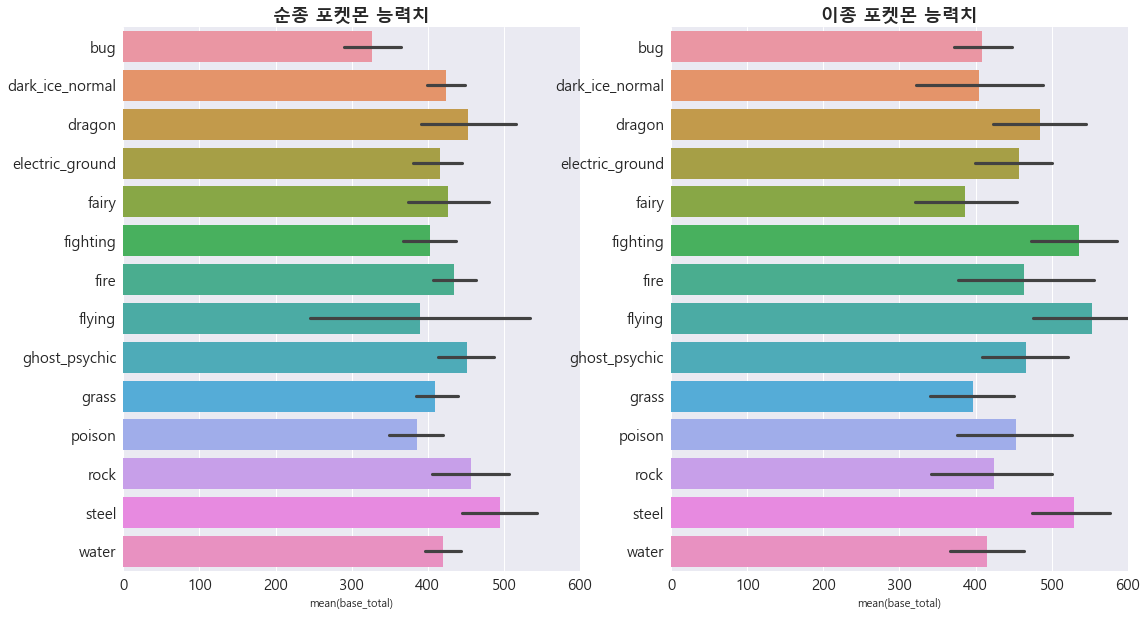

In [166]:
## 능력치 비교 시각화
def visualization(val,title):
    val.set_title(title, fontsize=18, weight='bold')
    val.tick_params(axis='both', which='major', labelsize=15)
    val.set_xlim(0,600)
    val.set_ylabel('')

fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18,10)


sns.barplot(data=pure_poke_hap.sort_values('raw_type2'), y='raw_type2',x='base_total',ax=ax1)
visualization(ax1,'순종 포켓몬 능력치')

sns.barplot(data=fusion_poke_hap.sort_values('new_type'), y='new_type',x='base_total',ax=ax2)
visualization(ax2,'이종 포켓몬 능력치')

In [167]:
## 순종, 이종 포켓몬 능력치 상세 비교
mean_pure = pd.DataFrame(pure_poke_hap.groupby('raw_type2')['base_total'].mean().apply(int))
mean_fusion = pd.DataFrame(fusion_poke_hap.groupby('new_type')['base_total'].mean().apply(int))
performance_comp = pd.concat([mean_pure, mean_fusion],axis=1)
performance_comp.columns = ['순종','이종']
performance_comp.T

,bug,dark_ice_normal,dragon,electric_ground,fairy,fighting,fire,flying,ghost_psychic,grass,poison,rock,steel,water
순종,326,424,452,416,427,403,435,390,452,410,385,456,495,420
이종,408,405,484,456,385,536,463,552,465,396,453,424,529,414


#### 통계적 검증(일원배치법=ANOVA)

In [168]:
## 능력치의 평균을 이용하므로 t-test를 통한 검정

import scipy.stats as stats
stats.ttest_ind(performance_comp['이종'], performance_comp['순종'])   

Ttest_indResult(statistic=1.9034366114379011, pvalue=0.068109677284419468)

### Result
* 가설검정결과(90%의 신뢰구간 : 데이터의 양이 매우 적으므로)
    - p-value가 0.06으로 0.1보다 작아서 **귀무가설을 기각**할 수 있다.
* 능력치를 비교한 결과
    1. 순종의 능력치 우위 : dark_ice_normal, fairy, grass, rock
    2. 이종의 능력치 우위 : bug, dragon, eletric_ground, fighting, fire, flying, poison, steel
    3. 비슷한 수준 : ghost_psychic, water
    
#### => 가설검증을 통해 '이종'포켓몬의 존재를 확인하였다.

## 3.2 이종포켓몬과 순종포켓의 차이
* 데이터탐색을 통한 확인

In [169]:
pokemon_data.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [170]:
def visualization(val,title):
    val.set_title(title, fontsize=18, weight='bold')
    val.tick_params(axis='both', which='major', labelsize=15)
    if(val == ax1 or val==ax2):
        val.set_xlim(0,600)
    val.set_ylabel('')
    if(val == ax3 or val==ax4):
        val.set_xlim()

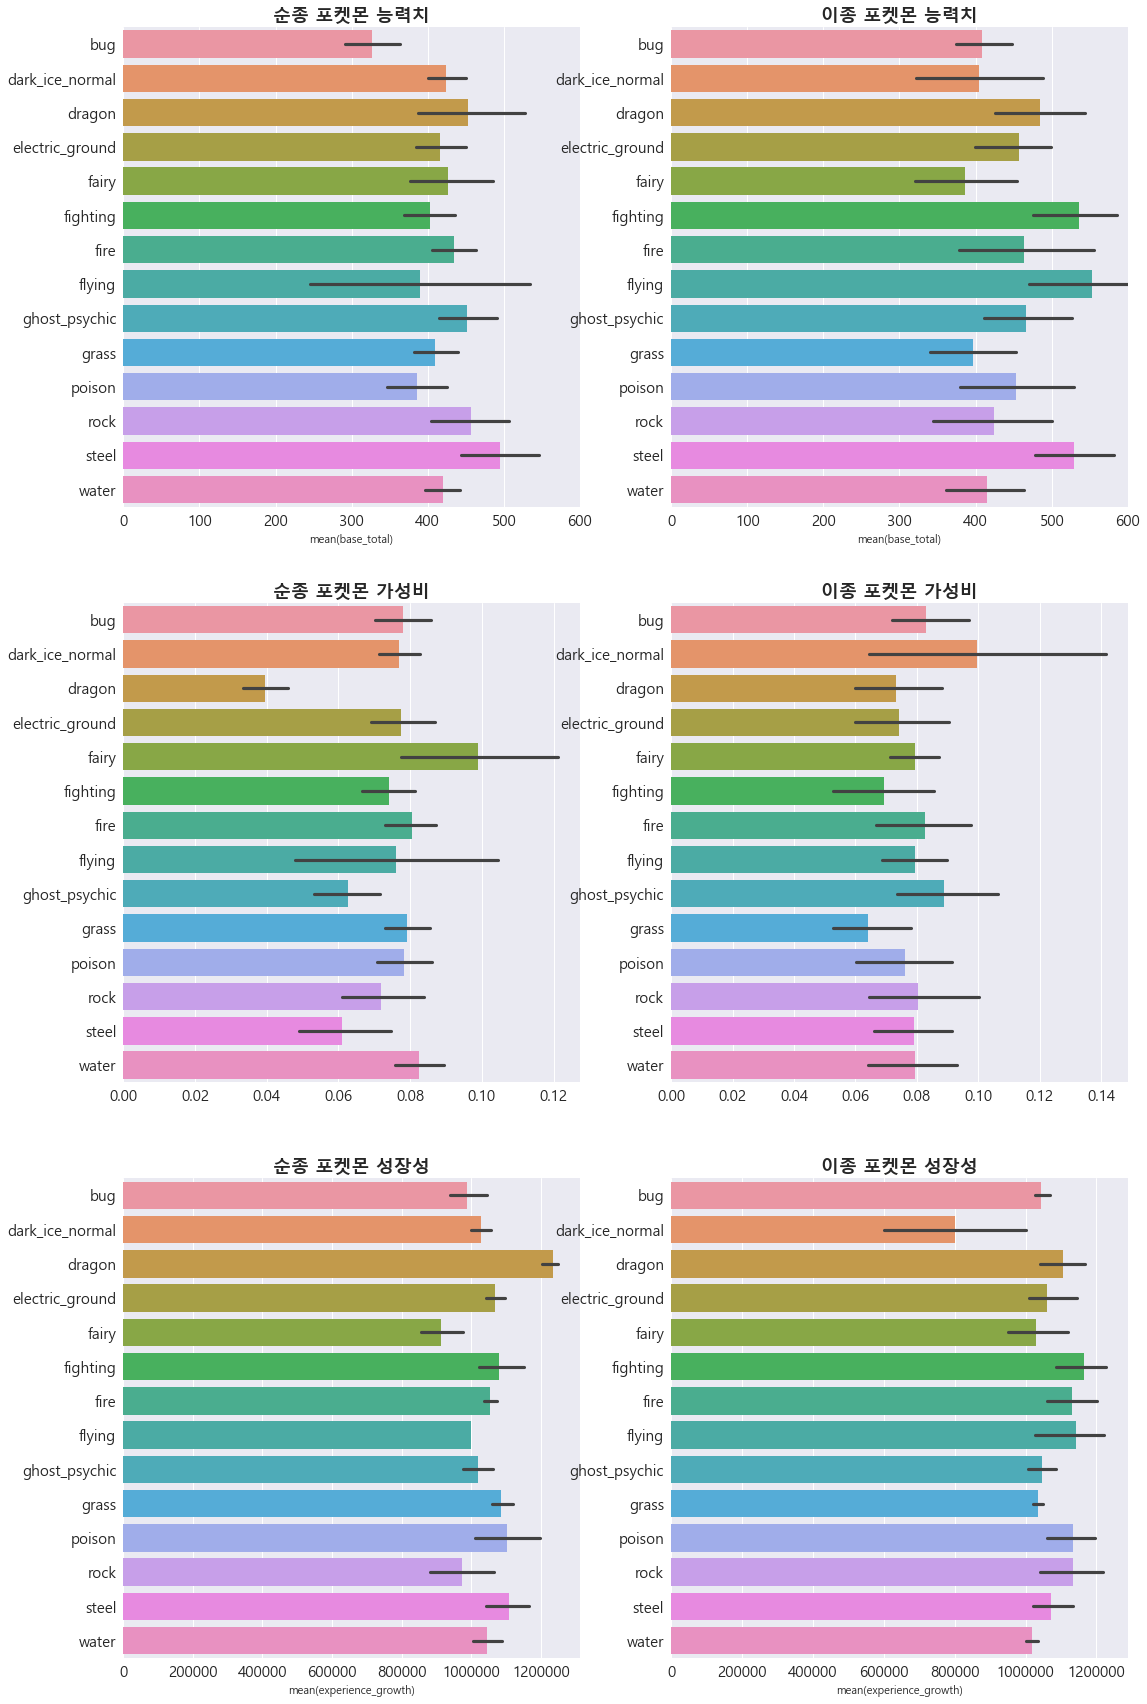

In [171]:
## 능력치 비교 시각화


fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2)
fig.set_size_inches(18,30)

## 능력치 비교
sns.barplot(data=pure_poke_hap.sort_values('raw_type2'), y='raw_type2',x='base_total',ax=ax1)
visualization(ax1,'순종 포켓몬 능력치')
sns.barplot(data=fusion_poke_hap.sort_values('new_type'), y='new_type',x='base_total',ax=ax2)
visualization(ax2,'이종 포켓몬 능력치')

##가성비 비교(가성비 = 능력치/진화필요 횟수)
test = pure_poke_hap['base_total']/pure_poke_hap['base_egg_steps']
sns.barplot(data=pure_poke_hap.sort_values('raw_type2'), y='raw_type2',x=test,ax=ax3)
visualization(ax3,'순종 포켓몬 가성비')
sns.barplot(data=fusion_poke_hap.sort_values('new_type'), y='new_type',x=test,ax=ax4)
visualization(ax4,'이종 포켓몬 가성비')

##성장성 비교(경험치 증가율) 높을 수록 미래의 성장성이 높다.(=키우기 힘들다.)
sns.barplot(data=pure_poke_hap.sort_values('raw_type2'), y='raw_type2',x='experience_growth',ax=ax5)
visualization(ax5,'순종 포켓몬 성장성')
sns.barplot(data=fusion_poke_hap.sort_values('new_type'), y='new_type',x='experience_growth',ax=ax6)
visualization(ax6,'이종 포켓몬 성장성')

### Result
* 탐색적 분석을 통해 **두 가지 종류의 포켓몬을 추천해 줄 수 있다.**
    1. 빠른성장으로 재미를 보고 싶은 유저에게 추천하는 속성
    2. 미래의 성장성을 기대하는 유저에게 추천하는 속성
    3. 기타 특이 포켓몬..

## 3.2 (1) 빠른성장 & 가성비좋은 포켓몬 <이종포켓몬>
* 순종포켓몬은 **"전형적인 상성"**을 가지고 있으므로 ex) 물은 불에 약하다. 싸움의 승리를 위해서는 **이종** 포켓몬으로 변수를 주는것이 좋다.
* 따라서 "이종포켓몬"을 기준으로 좋은 포켓몬을 찾아보자

In [172]:
## 순종, 이종 포켓몬 능력치 상세 비교
mean_pure = pd.DataFrame(pure_poke_hap.groupby('raw_type2')['base_total'].mean().apply(int))
mean_fusion = pd.DataFrame(fusion_poke_hap.groupby('new_type')['base_total'].mean().apply(int))
performance_comp = pd.concat([mean_pure, mean_fusion],axis=1)
performance_comp.columns = ['순종능력치','이종능력치']

performance_comp['compare'] = performance_comp['순종능력치']-performance_comp['이종능력치']
performance_comp['변동수준'] = abs(performance_comp['compare'])

for temp in performance_comp.index:
    if(performance_comp[performance_comp.index==temp]['compare'].values[0] > 0):
        performance_comp.loc[performance_comp.index==temp, 'compare'] = '순종승'
    else:
        performance_comp.loc[performance_comp.index==temp, 'compare'] = '이종승'
        
performance_comp.T

,bug,dark_ice_normal,dragon,electric_ground,fairy,fighting,fire,flying,ghost_psychic,grass,poison,rock,steel,water
순종능력치,326,424,452,416,427,403,435,390,452,410,385,456,495,420
이종능력치,408,405,484,456,385,536,463,552,465,396,453,424,529,414
compare,이종승,순종승,이종승,이종승,순종승,이종승,이종승,이종승,이종승,순종승,이종승,순종승,이종승,순종승
변동수준,82,19,32,40,42,133,28,162,13,14,68,32,34,6


In [173]:
## 순종, 이종 포켓몬 가성비 상세 비교
pure_poke_hap['pure_gaseong'] = pure_poke_hap['base_total']/pure_poke_hap['base_egg_steps']
fusion_poke_hap['fusion_gaseong'] = fusion_poke_hap['base_total']/fusion_poke_hap['base_egg_steps']

mean_pure = pd.DataFrame(pure_poke_hap.groupby('raw_type2')['pure_gaseong'].mean()*100)
mean_fusion = pd.DataFrame(fusion_poke_hap.groupby('new_type')['fusion_gaseong'].mean()*100)
performance_comp = pd.concat([mean_pure, mean_fusion],axis=1)
performance_comp.columns = ['순종가성비','이종가성비']

performance_comp['compare'] = performance_comp['순종가성비']-performance_comp['이종가성비']
performance_comp['변동수준'] = abs(performance_comp['compare'])

for temp in performance_comp.index:
    if(performance_comp[performance_comp.index==temp]['compare'].values[0] > 0):
        performance_comp.loc[performance_comp.index==temp, 'compare'] = '순종승'
    else:
        performance_comp.loc[performance_comp.index==temp, 'compare'] = '이종승'


performance_comp.T

,bug,dark_ice_normal,dragon,electric_ground,fairy,fighting,fire,flying,ghost_psychic,grass,poison,rock,steel,water
순종가성비,7.80342,7.70076,3.96037,7.73706,9.89185,7.42293,8.05787,7.61719,6.26281,7.90794,7.81529,7.19153,6.11173,8.23495
이종가성비,8.24751,6.52669,6.49848,9.38151,9.26432,7.47803,6.74552,6.14934,7.56561,8.36372,7.53348,8.28451,7.69748,7.25781
compare,이종승,순종승,이종승,이종승,순종승,이종승,순종승,순종승,이종승,이종승,순종승,이종승,이종승,순종승
변동수준,0.444089,1.17407,2.53811,1.64445,0.627532,0.0551007,1.31236,1.46785,1.3028,0.455773,0.281808,1.09297,1.58575,0.977133


### Result
* 능력치 와 가성비 모두 "이종" 이 높은 종족 ( bug, dragon, eletric_ground, fighting, ghost_psychic, steel)
* 그중, 가성비가 가장 좋은 종족 : electric_gound / 능력치가 가장 좋은 종족 : fighting

#### => 완전 빠른 성장이 목적 =  electric_ground 속성의 포켓몬 추천 (능력치 순위 : 6위)
#### => 적당한 성장 but 강한 포켓몬의 목적 = fighting 속성의 포켓몬 추천 (가성비 순위 : 8위) 

## 3.2 (2) 미래의 성장성이 높은 포켓몬

In [174]:
## 순종, 이종 포켓몬 능력치 상세 비교
## 높을수록 성장 경험치가 많이 필요하다 = 키우기 힘들다. but 후반에 강해질 확률이 높다.

mean_pure = pd.DataFrame(pure_poke_hap.groupby('raw_type2')['experience_growth'].mean().apply(int))
mean_fusion = pd.DataFrame(fusion_poke_hap.groupby('new_type')['experience_growth'].mean().apply(int))
performance_comp = pd.concat([mean_pure, mean_fusion],axis=1)
performance_comp.columns = ['순종성장성','이종성장성']

performance_comp['compare'] = performance_comp['순종성장성']-performance_comp['이종성장성']
performance_comp['변동수준'] = abs(performance_comp['compare'])

for temp in performance_comp.index:
    if(performance_comp[performance_comp.index==temp]['compare'].values[0] > 0):
        performance_comp.loc[performance_comp.index==temp, 'compare'] = '순종승'
    else:
        performance_comp.loc[performance_comp.index==temp, 'compare'] = '이종승'
        
performance_comp.T

,bug,dark_ice_normal,dragon,electric_ground,fairy,fighting,fire,flying,ghost_psychic,grass,poison,rock,steel,water
순종성장성,989192,1027673,1234375,1067360,913888,1079566,1054147,1000000,1019972,1086592,1102830,972837,1108551,1046813
이종성장성,1044703,800000,1104166,1061620,1030000,1163732,1131064,1141495,1044992,1034918,1132797,1134976,1072476,1017958
compare,이종승,순종승,순종승,순종승,이종승,이종승,이종승,이종승,이종승,순종승,이종승,이종승,순종승,순종승
변동수준,55511,227673,130209,5740,116112,84166,76917,141495,25020,51674,29967,162139,36075,28855


#### Result
* 후반만 바라보는 유저는 느리더라도 무조건 강할걸 좋아한다.
* 성장성 1위 : fighting (능력치 순위 : 1위)


#### => fighting종족 강력 추천

# 최종 포켓몬
* fighting 종족 중 최강의 포켓몬

In [175]:
final_pokemon = fusion_poke_hap[fusion_poke_hap['new_type'] == 'fighting']
print(final_pokemon.shape)
final_pokemon

(8, 46)


,name,raw_type,new_type,raw_type2,check,abilities,against_bug,against_dark,against_dragon,against_electric,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,fusion_gaseong
21,Poliwrath,water,fighting,1,이종,"['Water Absorb', 'Damp', 'Swift Swim']",0.5,0.5,1.0,2.0,...,62,70,90,70,water,fighting,54.0,1,0,0.099609
73,Heracross,bug,fighting,2,이종,"['Swarm', 'Guts', 'Moxie']",0.5,0.5,1.0,1.0,...,214,40,105,75,bug,fighting,54.0,2,0,0.093750
153,Gallade,psychic,fighting,3,이종,"['Steadfast', 'Justified']",1.0,1.0,1.0,1.0,...,475,65,115,110,psychic,fighting,52.0,4,0,0.120703
207,Keldeo,water,fighting,1,이종,['Justified'],0.5,0.5,1.0,2.0,...,647,129,90,108,water,fighting,48.5,5,1,0.028320
241,Stufful,normal,fighting,8,이종,"['Fluffy', 'Klutz', 'Cute Charm']",0.5,0.5,1.0,1.0,...,759,45,50,50,normal,fighting,6.8,7,0,0.088542
242,Bewear,normal,fighting,8,이종,"['Fluffy', 'Klutz', 'Unnerve']",0.5,0.5,1.0,1.0,...,760,55,60,60,normal,fighting,135.0,7,0,0.130208
252,Buzzwole,bug,fighting,2,이종,['Beast Boost'],0.5,0.5,1.0,1.0,...,794,53,53,79,bug,fighting,333.6,7,1,0.018555
253,Pheromosa,bug,fighting,2,이종,['Beast Boost'],0.5,0.5,1.0,1.0,...,795,137,37,151,bug,fighting,25.0,7,1,0.018555


In [176]:
final_pokemon['gaseong'] = final_pokemon['base_total']/final_pokemon['base_egg_steps']

C:\Users\Moon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
final_pokemon[['name','base_total','experience_growth','gaseong','capture_rate']]

,name,base_total,experience_growth,gaseong,capture_rate
21,Poliwrath,510,1059860,0.099609,45
73,Heracross,600,1250000,0.093750,45
153,Gallade,618,1250000,0.120703,45
207,Keldeo,580,1250000,0.028320,3
241,Stufful,340,1000000,0.088542,140
242,Bewear,500,1000000,0.130208,70
252,Buzzwole,570,1250000,0.018555,25
253,Pheromosa,570,1250000,0.018555,255


## 4. 최종결과 & 아쉬운점

* **추천포켓몬**
    - "Gallade" : 얼레이드, 실제 포켓몬 세계관에서도 강력한 친구!
    
    
* **최종결과** 
    - 탐색적 방법을 사용하여 "이종"포켓몬의 존재를 확인하였다.


* **아쉬운점**
    - 데이터 양의 부족으로 **효과적인 군집**을 이루지 못했다.
    - 군집의 결과가 완벽하다 할 수 없어 분석의 빈틈이 많다.....
    - 데이터의 양이 너무 부족하여 통계적 검증부분에서 근거가 부족하였다. 또한, **머신러닝**을 활용하여 인사이트를 도출하는데 한계가 있었다. 만약, 801종의 포켓몬별로 각각 1개의 샘플이 아닌 여러 데이터가 있었다면 더 좋은 분석이 가능했을거 같아 아쉬움이 남는다...